In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# transforming age from days to year
df['age'] = (df['age']/365).round().astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


## Handling Outliers

In [7]:
print(df['age'].min())
print(df['age'].max())

30
65


In [8]:
print(df['height'].min())
print(df['height'].max())

df = df[df['height'] >= 120]

55
250


In [9]:
print(df['weight'].min())
print(df['weight'].max())

df = df[df['weight'] >= 40]

10.0
200.0


In [10]:
print(df['ap_hi'].min())
print(df['ap_hi'].max())

df = df[(df['ap_hi'] > 60) & (df['ap_hi'] < 230)]

-150
16020


In [11]:
print(df['ap_lo'].min())
print(df['ap_lo'].max())

df = df[(df['ap_lo'] > 30) & (df['ap_lo'] < 150)]


0
11000


In [12]:
print(df['gender'].unique())
print(df['cholesterol'].unique())
print(df['gluc'].unique())
print(df['smoke'].unique())
print(df['alco'].unique())
print(df['cardio'].unique())

[2 1]
[1 3 2]
[1 2 3]
[0 1]
[0 1]
[0 1]


## Normalizing

In [13]:
cols_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.491433,2,0.452018,-0.850898,-0.995379,-0.141903,1,1,0,0,1,0
1,1,0.247412,1,-1.064844,0.761285,0.802295,0.909276,3,1,0,0,1,1
2,2,-0.195895,1,0.072803,-0.710708,0.203070,-1.193082,3,1,0,0,0,1
3,3,-0.786971,2,0.578424,0.551000,1.401520,1.960455,1,1,0,0,1,1
4,4,-0.786971,1,-1.064844,-1.271467,-1.594604,-2.244261,1,1,0,0,0,0


## Visualization And Removing Non related columns

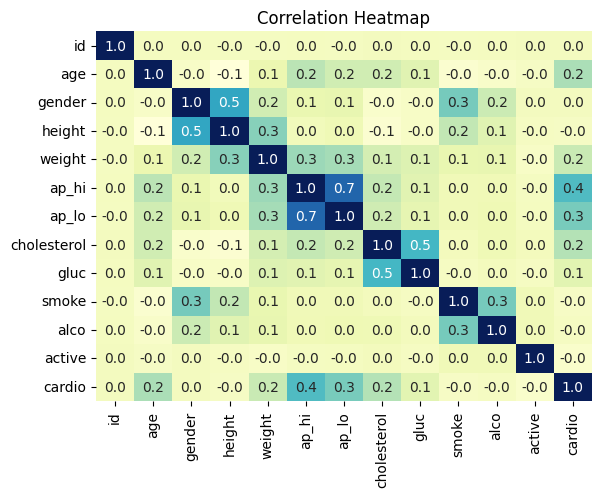

In [14]:
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='YlGnBu',cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
df = df.drop(['gender', 'height', 'smoke', 'alco', 'active'], axis=1)
df.head()

,id,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,0,-0.491433,-0.850898,-0.995379,-0.141903,1,1,0
1,1,0.247412,0.761285,0.802295,0.909276,3,1,1
2,2,-0.195895,-0.710708,0.203070,-1.193082,3,1,1
3,3,-0.786971,0.551000,1.401520,1.960455,1,1,1
4,4,-0.786971,-1.271467,-1.594604,-2.244261,1,1,0


In [16]:
from sklearn.preprocessing import StandardScaler

# Use
df.to_csv('cleaned_cardio.csv', index=False)